In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from category_encoders.target_encoder import TargetEncoder
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.metrics import mean_squared_error, r2_score
os.chdir('C:/Users/johan/SynologyDrive/Johan Scolaire/M2/1st semester/Machine Learning')
print(os.getcwd())

C:\Users\johan\SynologyDrive\Johan Scolaire\M2\1st semester\Machine Learning


In [179]:
def process_percentage_column(column):
    return column.str.rstrip('%').astype(float) / 100

In [181]:
#We will get the 2012,2016,2020 datasets
df_2012=pd.read_csv('Data/Features_2012.csv')
df_2016=pd.read_csv('Data/Features_2016.csv')
df_2021=pd.read_csv('Data/Features_2021.csv')

df_target_2012=pd.read_csv('Data/2012 Election Results.csv')
df_target_2016=pd.read_csv('Data/2016 Presidential Election Results by State.csv')
df_target_2020=pd.read_csv('Data/2020 elections made.csv')

df_test_2023=pd.read_csv('Data/Features_2023.csv')

df_target_2012.drop([51],axis=0,inplace=True)
df_target_2012[['Percentage Democrat', 'Percentage Republican', 'Percentage Other']] = df_target_2012[['Percentage Democrat', 'Percentage Republican', 'Percentage Other']].apply(pd.to_numeric, errors='coerce')
df_target_2012[['Percentage Democrat', 'Percentage Republican', 'Percentage Other']]=df_target_2012[['Percentage Democrat', 'Percentage Republican', 'Percentage Other']].div(100) #fixed

#print(df_target_2012) #nice
df_target_2020[['Percentage Democrat', 'Percentage Republican', 'Percentage Other']]=df_target_2020[['Percentage Democrat', 'Percentage Republican', 'Percentage Other']].apply(process_percentage_column)

#Merge feature data
df_train=pd.concat([df_2012,df_2016,df_2021],ignore_index=True)
#print(df_train)

# #Merge target data
df_target=pd.concat([df_target_2012,df_target_2016,df_target_2020],ignore_index=True)
#print(df_target)
#Make indices nice etc
df_train.set_index("NAME",inplace=True) #nice
df_target.set_index("STATE",inplace=True)
df_test_2023.set_index("NAME",inplace=True)
#print(df_train)

#Fixes:
#GRAPI is wrong for anything other than 2012. RIP
df_train.drop(df_train.columns[df_train.columns.str.contains('GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME')], axis=1, inplace=True)
df_test_2023.drop(df_test_2023.columns[df_test_2023.columns.str.contains('GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME')], axis=1, inplace=True)

#df_train
df_test_2023

,MEDIAN AGE,% under 18,% 65+,% 18+,% One race WHITE,% One race BLACK,% Two or more races,% One race Mexican,% One race Asian,% One race Native Hawaiian,...,Median rent in dollars,Unemployment rate,% Owner-occupied homes,% Living below poverty level over last 12 months,% Health insurance coverage,Mean family income,% Bachelor or higher,% Until High School,% Arab ancestry,Year
NAME,,,,,,,,,,,,,,,,,,,,,
Alabama,39.6,22.1,18.2,77.9,64.7,25.4,5.6,3.0,1.5,0.0,...,982,4.0,70.1,29.4,91.5,103839,28.9,30.1,0.2,2023
Alaska,36.5,23.8,14.0,76.2,59.6,2.9,14.1,3.7,5.9,0.5,...,1373,4.8,66.3,19.4,89.6,133034,32.2,29.1,0.3,2023
Arizona,39.3,21.3,19.3,78.7,58.3,4.8,19.9,27.2,3.6,0.1,...,1608,4.3,67.7,23.6,90.1,121773,33.5,23.4,0.6,2023
Arkansas,38.9,22.9,18.0,77.1,68.9,14.4,11.5,6.4,1.7,0.0,...,933,4.2,66.2,29.5,91.1,97874,26.2,34.2,0.1,2023
California,38.2,21.7,16.2,78.3,38.5,5.4,19.0,32.5,15.8,0.0,...,1992,5.5,55.9,24.9,93.6,151243,37.5,20.4,0.9,2023
Colorado,37.9,20.6,16.1,79.4,70.4,3.9,14.7,15.8,3.3,0.0,...,1771,3.8,65.7,19.0,93.3,148071,46.4,19.3,0.4,2023
Connecticut,41.5,20.0,19.1,80.0,64.5,10.9,10.8,1.8,4.9,0.0,...,1463,4.6,65.7,20.7,94.3,158476,42.9,25.5,0.7,2023
Delaware,42.0,20.5,21.3,79.5,59.3,22.5,8.2,3.6,4.3,0.0,...,1358,3.5,73.6,20.5,93.5,129963,36.5,28.5,0.6,2023
District of Columbia,34.9,18.6,13.1,81.4,38.8,40.9,10.7,2.4,4.2,0.0,...,1904,5.3,39.1,16.8,97.3,217653,65.9,13.1,1.1,2023


In [183]:
#XGBoost Regression
X=df_train
y=df_target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)
estimators = [
    ("imputation_mean", SimpleImputer(missing_values=np.nan, strategy="mean")),
    ("scaler", StandardScaler()),
    ('clf', XGBRegressor(random_state=8))
]
pipe=Pipeline(steps=estimators)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print(y_pred)
test_r2=r2_score(y_test,y_pred)
print(test_r2)
df_results=pd.DataFrame(y_pred)
df_results.to_csv(f'Data\Results_2023.csv', index=True)

[[ 5.8764237e-01  4.2208457e-01 -4.4479311e-04]
 [ 6.6405147e-01  2.9864162e-01  5.3207636e-02]
 [ 5.1026726e-01  4.2447793e-01  2.4289617e-02]
 [ 4.2979029e-01  4.6161908e-01  7.7213976e-05]
 [ 6.1258322e-01  4.4474581e-01  2.0710150e-02]
 [ 3.7948176e-01  5.1210403e-01  3.3809431e-02]
 [ 3.4079510e-01  5.5974567e-01  3.3519816e-02]
 [ 4.9558833e-01  4.3185139e-01  4.2652991e-02]
 [ 4.7316393e-01  4.5223954e-01  2.4412265e-02]
 [ 6.0768116e-01  3.9890397e-01  2.3214661e-02]
 [ 5.0349164e-01  4.5410722e-01  1.3812804e-03]
 [ 6.0486197e-01  3.8291955e-01  1.4580834e-02]
 [ 4.6138668e-01  4.9556231e-01  3.5527755e-02]
 [ 4.1797444e-01  5.9514713e-01  4.1693050e-02]
 [ 5.5022734e-01  4.6613246e-01  8.4952917e-05]
 [ 4.7160029e-01  4.4925895e-01  2.6956921e-02]
 [ 3.5453191e-01  5.1257610e-01  4.1193441e-02]
 [ 5.4365855e-01  4.2815158e-01  1.4883623e-02]
 [ 5.6567830e-01  3.8201475e-01  3.3742640e-02]
 [ 4.7854140e-01  3.6013213e-01  4.0924989e-02]
 [ 3.7357980e-01  5.6302679e-01 -4.56653

<>:17: SyntaxWarning: invalid escape sequence '\R'
<>:17: SyntaxWarning: invalid escape sequence '\R'
C:\Users\johan\AppData\Local\Temp\ipykernel_13316\93061831.py:17: SyntaxWarning: invalid escape sequence '\R'
  df_results.to_csv(f'Data\Results_2023.csv', index=True)


In [185]:
df_test_2023
State_orders = df_test_2023.index.to_numpy()
print(State_orders)

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


In [187]:
search_space = {
    'clf__max_depth': Integer(2,8),
    'clf__learning_rate': Real(0.001, 1.0, prior='log-uniform'),
    'clf__subsample': Real(0.5, 1.0),
    'clf__colsample_bytree': Real(0.5, 1.0),
    'clf__colsample_bylevel': Real(0.5, 1.0),
    'clf__colsample_bynode' : Real(0.5, 1.0),
    'clf__reg_alpha': Real(0.0, 10.0),
    'clf__reg_lambda': Real(0.0, 10.0),
    'clf__gamma': Real(0.0, 10.0)
}
                                       #cv: number of folds
opt = BayesSearchCV(pipe, search_space, cv=3, n_iter=5, scoring='r2', random_state=8) 
# in reality, you may consider setting cv and n_iter to higher values

In [189]:
opt.fit(X_train, y_train)
best_model = opt.best_estimator_
y_pred = best_model.predict(X_test)
test_r2 = r2_score(y_test, y_pred)
# Output results

print("Best hyperparameters:", opt.best_params_)
print("R^2 score on the test set:", test_r2)

Best hyperparameters: OrderedDict({'clf__colsample_bylevel': 0.7750018497221565, 'clf__colsample_bynode': 0.5614437441596264, 'clf__colsample_bytree': 0.9126202065825759, 'clf__gamma': 8.289497472648083, 'clf__learning_rate': 0.4299244814327041, 'clf__max_depth': 6, 'clf__reg_alpha': 2.784887532399771, 'clf__reg_lambda': 1.67027558902639, 'clf__subsample': 0.5966102807384807})
R^2 score on the test set: -1.4675713777542114


In [191]:
y_2023 = pipe.predict(df_test_2023)
print(y_2023)
# test_r2=r2_score(y_test,y_pred)
# print(test_r2)
df_results=pd.DataFrame(y_2023)
df_results.to_csv(f'Data\Results_2023.csv', index=True)

[[0.3743298  0.58052945 0.03836443]
 [0.39247748 0.5300566  0.04339309]
 [0.51902586 0.4355908  0.03772557]
 [0.39179045 0.5637133  0.03731529]
 [0.6546774  0.29105216 0.03596279]
 [0.5042735  0.39189276 0.03750478]
 [0.5796125  0.39290798 0.04194616]
 [0.5237591  0.37847286 0.03736698]
 [0.78405476 0.06769337 0.03674998]
 [0.5020563  0.43539864 0.0366193 ]
 [0.49549797 0.40663767 0.03742824]
 [0.6461086  0.2972873  0.03717332]
 [0.3578605  0.5077965  0.04148975]
 [0.58859617 0.40390128 0.03652459]
 [0.43445987 0.44463697 0.03596126]
 [0.46184215 0.4401934  0.03422032]
 [0.37209854 0.5278568  0.04016501]
 [0.4440545  0.4781175  0.04313305]
 [0.42888045 0.45057875 0.04308501]
 [0.4342084  0.40975422 0.04332659]
 [0.67913336 0.34698153 0.04227941]
 [0.5888449  0.38760495 0.04630915]
 [0.502799   0.43916595 0.03627715]
 [0.50083256 0.41943723 0.03873556]
 [0.37756544 0.59536517 0.04173687]
 [0.36529326 0.44695652 0.0381314 ]
 [0.38032228 0.545015   0.03685782]
 [0.47002873 0.39716625 0.04

<>:6: SyntaxWarning: invalid escape sequence '\R'
<>:6: SyntaxWarning: invalid escape sequence '\R'
C:\Users\johan\AppData\Local\Temp\ipykernel_13316\99628672.py:6: SyntaxWarning: invalid escape sequence '\R'
  df_results.to_csv(f'Data\Results_2023.csv', index=True)


In [193]:
import seaborn as sns
import geopandas as gpd

from PIL import Image
from matplotlib.patches import Patch, Circle

edge_color = "#30011E"
background_color = "#fafafa"

sns.set_style({
    "font.family": "serif",
    "figure.facecolor": background_color,
    "axes.facecolor": background_color,
})

In [195]:
def translate_geometries(df, x, y, scale, rotate):
    df.loc[:, "geometry"] = df.geometry.translate(yoff=y, xoff=x)
    center = df.dissolve().centroid.iloc[0]
    df.loc[:, "geometry"] = df.geometry.scale(xfact=scale, yfact=scale, origin=center)
    df.loc[:, "geometry"] = df.geometry.rotate(rotate, origin=center)
    return df

def adjust_maps(df):
    df_main_land = df[~df.STATEFP.isin(["02", "15"])]
    df_alaska = df[df.STATEFP == "02"]
    df_hawaii = df[df.STATEFP == "15"]

    df_alaska = translate_geometries(df_alaska, 1300000, -4900000, 0.5, 32)
    df_hawaii = translate_geometries(df_hawaii, 5400000, -1500000, 1, 24)

    return pd.concat([df_main_land, df_alaska, df_hawaii])

In [197]:
# counties = gpd.read_file("./data/cb_2018_us_county_500k/")
# counties = counties[~counties.STATEFP.isin(["72", "69", "60", "66", "78"])]
# counties = counties.set_index("GEOID")

states = gpd.read_file("./data_drawing/cb_2018_us_state_500k/")
states = states[~states.STATEFP.isin(["72", "69", "60", "66", "78"])]

# counties = counties.to_crs("ESRI:102003")
states = states.to_crs("ESRI:102003")
states = states.set_index("NAME")
states = states.sort_index()
states["NUMBER"] = [k for k in range(1, 52)]
states

# states = states.set_index("NUMBER")

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,LSAD,ALAND,AWATER,geometry,NUMBER
NAME,,,,,,,,,,
Alabama,01,01779775,0400000US01,01,AL,00,131174048583,4593327154,"MULTIPOLYGON (((760323.731 -749311.532, 760524...",1
Alaska,02,01785533,0400000US02,02,AK,00,1478839695958,245481577452,"MULTIPOLYGON (((-5215608.250 4091976.898, -521...",2
Arizona,04,01779777,0400000US04,04,AZ,00,294198551143,1027337603,"POLYGON ((-1746851.979 -384872.148, -1746649.6...",3
Arkansas,05,00068085,0400000US05,05,AR,00,134768872727,2962859592,"POLYGON ((122663.982 -111221.267, 122680.313 -...",4
California,06,01779778,0400000US06,06,CA,00,403503931312,20463871877,"MULTIPOLYGON (((-2066923.367 -203083.138, -206...",5
Colorado,08,01779779,0400000US08,08,CO,00,268422891711,1181621593,"POLYGON ((-1123222.584 200517.564, -1121310.59...",6
Connecticut,09,01779780,0400000US09,09,CT,00,12542497068,1815617571,"MULTIPOLYGON (((1913282.319 654438.022, 191325...",7
Delaware,10,01779781,0400000US10,10,DE,00,5045925646,1399985648,"MULTIPOLYGON (((1727522.772 412274.942, 172770...",8
District of Columbia,11,01702382,0400000US11,11,DC,00,158340391,18687198,"POLYGON ((1610776.964 321299.687, 1611258.938 ...",9


In [198]:
# counties = adjust_maps(counties)
states = adjust_maps(states)
states

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,LSAD,ALAND,AWATER,geometry,NUMBER
NAME,,,,,,,,,,
Alabama,01,01779775,0400000US01,01,AL,00,131174048583,4593327154,"MULTIPOLYGON (((760323.731 -749311.532, 760524...",1
Arizona,04,01779777,0400000US04,04,AZ,00,294198551143,1027337603,"POLYGON ((-1746851.979 -384872.148, -1746649.6...",3
Arkansas,05,00068085,0400000US05,05,AR,00,134768872727,2962859592,"POLYGON ((122663.982 -111221.267, 122680.313 -...",4
California,06,01779778,0400000US06,06,CA,00,403503931312,20463871877,"MULTIPOLYGON (((-2066923.367 -203083.138, -206...",5
Colorado,08,01779779,0400000US08,08,CO,00,268422891711,1181621593,"POLYGON ((-1123222.584 200517.564, -1121310.59...",6
Connecticut,09,01779780,0400000US09,09,CT,00,12542497068,1815617571,"MULTIPOLYGON (((1913282.319 654438.022, 191325...",7
Delaware,10,01779781,0400000US10,10,DE,00,5045925646,1399985648,"MULTIPOLYGON (((1727522.772 412274.942, 172770...",8
District of Columbia,11,01702382,0400000US11,11,DC,00,158340391,18687198,"POLYGON ((1610776.964 321299.687, 1611258.938 ...",9
Florida,12,00294478,0400000US12,12,FL,00,138949136250,31361101223,"MULTIPOLYGON (((1599929.568 -1197648.525, 1600...",10


In [200]:
#Now we move hawaï and alaska back to where they were

hawaii = states.iloc[-1]
states = states.drop(states.index[-1])
alaska = states.iloc[-1]
states = states.drop(states.index[-1])

states = pd.concat([states.iloc[:1], pd.DataFrame([alaska]), states.iloc[1:]]).reset_index(drop=True) # for alaska
states = pd.concat([states.iloc[:11], pd.DataFrame([hawaii]), states.iloc[11:]]).reset_index(drop=True) # for hawaii

states


,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,LSAD,ALAND,AWATER,geometry,NUMBER
0,01,01779775,0400000US01,01,AL,00,131174048583,4593327154,"MULTIPOLYGON (((760323.731 -749311.532, 760524...",1
1,02,01785533,0400000US02,02,AK,00,1478839695958,245481577452,"MULTIPOLYGON (((-2774046.161 -1564962.401, -27...",2
2,04,01779777,0400000US04,04,AZ,00,294198551143,1027337603,"POLYGON ((-1746851.979 -384872.148, -1746649.6...",3
3,05,00068085,0400000US05,05,AR,00,134768872727,2962859592,"POLYGON ((122663.982 -111221.267, 122680.313 -...",4
4,06,01779778,0400000US06,06,CA,00,403503931312,20463871877,"MULTIPOLYGON (((-2066923.367 -203083.138, -206...",5
5,08,01779779,0400000US08,08,CO,00,268422891711,1181621593,"POLYGON ((-1123222.584 200517.564, -1121310.59...",6
6,09,01779780,0400000US09,09,CT,00,12542497068,1815617571,"MULTIPOLYGON (((1913282.319 654438.022, 191325...",7
7,10,01779781,0400000US10,10,DE,00,5045925646,1399985648,"MULTIPOLYGON (((1727522.772 412274.942, 172770...",8
8,11,01702382,0400000US11,11,DC,00,158340391,18687198,"POLYGON ((1610776.964 321299.687, 1611258.938 ...",9
9,12,00294478,0400000US12,12,FL,00,138949136250,31361101223,"MULTIPOLYGON (((1599929.568 -1197648.525, 1600...",10


In [203]:
def create_state_colors(results):
    colors = ["blue", "red", "yellow"]
    state_colors = np.array([colors[np.argmax(results[i])] for i in range(len(results))])
    return state_colors



In [205]:
predicted_results_y_2023 = np.array([np.concatenate((y_2023[i], [State_orders[i]])) for i in range(len(y_2023))])
print(predicted_results_y_2023, states)

[['0.3743298' '0.58052945' '0.03836443' 'Alabama']
 ['0.39247748' '0.5300566' '0.043393087' 'Alaska']
 ['0.51902586' '0.4355908' '0.03772557' 'Arizona']
 ['0.39179045' '0.5637133' '0.03731529' 'Arkansas']
 ['0.6546774' '0.29105216' '0.035962787' 'California']
 ['0.5042735' '0.39189276' '0.037504785' 'Colorado']
 ['0.5796125' '0.39290798' '0.041946158' 'Connecticut']
 ['0.5237591' '0.37847286' '0.03736698' 'Delaware']
 ['0.78405476' '0.06769337' '0.036749978' 'District of Columbia']
 ['0.5020563' '0.43539864' '0.0366193' 'Florida']
 ['0.49549797' '0.40663767' '0.037428245' 'Georgia']
 ['0.6461086' '0.2972873' '0.03717332' 'Hawaii']
 ['0.3578605' '0.5077965' '0.041489754' 'Idaho']
 ['0.58859617' '0.40390128' '0.036524594' 'Illinois']
 ['0.43445987' '0.44463697' '0.03596126' 'Indiana']
 ['0.46184215' '0.4401934' '0.03422032' 'Iowa']
 ['0.37209854' '0.5278568' '0.04016501' 'Kansas']
 ['0.4440545' '0.4781175' '0.04313305' 'Kentucky']
 ['0.42888045' '0.45057875' '0.043085005' 'Louisiana']
 [

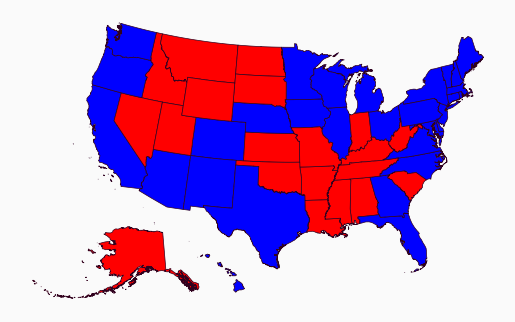

In [207]:
ax = states.plot(edgecolor=edge_color, color=create_state_colors(y_2023), linewidth=0.5)

plt.axis("off")
plt.show()

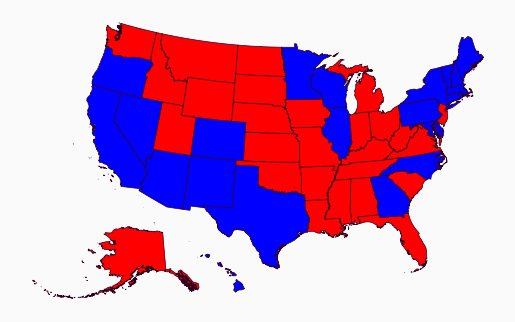

In [209]:
Bayes_method = pd.read_csv("./Data/Results_2023_Bayes.csv")
Bayes_method = Bayes_method.drop(columns=["Unnamed: 0"])
Bayes_method_result = Bayes_method.to_numpy()

ax = states.plot(edgecolor=edge_color, color=create_state_colors(Bayes_method_result), linewidth=0.5)

plt.axis("off")
plt.show()

In [279]:
Bayes_method

,0,1,2
0,0.378238,0.555386,0.022742
1,0.362342,0.524254,0.058127
2,0.474583,0.455513,0.029384
3,0.373429,0.583154,0.030927
4,0.567304,0.264950,0.027602
5,0.493288,0.405004,0.045540
6,0.538366,0.403624,0.026309
7,0.474380,0.387052,0.026896
8,0.704911,0.255020,0.029702
9,0.436375,0.467276,0.018579


In [265]:
create_state_colors(Bayes_method_result)

array(['red', 'red', 'blue', 'red', 'blue', 'blue', 'blue', 'blue',
       'blue', 'red', 'blue', 'blue', 'red', 'blue', 'red', 'red', 'red',
       'red', 'red', 'blue', 'blue', 'blue', 'red', 'blue', 'red', 'red',
       'red', 'red', 'blue', 'blue', 'red', 'blue', 'blue', 'blue', 'red',
       'red', 'red', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'blue',
       'red', 'blue', 'red', 'red', 'red', 'blue', 'red'], dtype='<U4')